# Data insights

This notebook includes some methods and plots to explore the data collected via the temperature sensors and general actors to visualize the change / movement of temperature to enable further improvement of the algorithms that control all components

## The Packages used

To easily work with the given data and REST Api, some packages are needed that improve dataplotting and collecting. Additionally, some global variables are initialized here that later will be used.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json

In [6]:
url_data = "https://api.alpaka.fyi/get_json"
url_motor_data = "https://api.alpaka.fyi/get_motor"
filepath = "./data/"

## The Dataset

### Temperature Sensors

The data is provided by a REST Api with the following layout:

Name | API name | Datatype
---- | ---- | ----
Temperature | temperatur | Float
Time recorded | zeitpunkt | Unix timestamp
Sensor ID | sensor_id | Int
Sensor Name | sensor_name | String

In json format the data looks like this

``` json
{
    "sensor_id": 1,
    "sensor_name": "Sensor1",
    "temperatur": 25.0,
    "zeitpunkt": 123456545
}
```

### Fan / Servo

The servo / fan data is provided by the REST Api in the following json layout

``` json
{
    "motor_id": 1,
    "type": "servo",
    "setting": 255
}
```

The following table also explains the provided data in more details

Name | API name | Datatype | Meaning
---- | ---- | ---- | ---- 
Motor ID | motor_id | Int | ID of the servo / fan motor
Type | type | String | Type (name) of the motor; is either fan or servo
Set speed / position | setting | int | if a servo: Set position of the servo in steps (0...8 in 12.5° ingrements); if a fan: Speed of the fan (0...255)

## Fetching the data from the server and store in file

The API is available via the following URL: `api.alpaka.fyi`.

### Fetch temp data and store it

To receive all the temperature data stored in the database, we can use the `/get_json` endpoint.

In [5]:
response = requests.get(url_data)
temp_data_json = response.json()

unique_sensors = []
sensors_list = {}

for d in temp_data_json:
    if not d['sensor_id'] in unique_sensors:
        unique_sensors.append(d['sensor_id'])
        sensors_list[d['sensor_id']] = []

    sensors_list[d['sensor_id']].append(d)

for id in sensors_list:
    file = open(filepath + "temp_data_" + str(id) + ".json", "w")
    file.write(json.dumps(sensors_list[id]))
    file.close()

### Fetch motor data and store it to disk

To receive all the motor data stored in the database, we can use the /get_motor endpoint.

In [7]:
response = requests.get(url_motor_data)
motor_data_json = response.json()

unique_motors = []
motors_list = {}

for d in motor_data_json:
    if not d['motor_id'] in unique_motors:
        unique_motors.append(d['motor_id'])
        motors_list[d['motor_id']] = []
    
    motors_list[d['motor_id']].append(d)
    
for id in motors_list:
    file = open(filepath + "motor_data_" + str(id) + ".json", "w")
    file.write(json.dumps(motors_list[id]))
    file.close()

### Loading the data into pandas

In [5]:
data_sense_1 = pd.read_json(filepath + "temp_data_1.json")
data_sense_2 = pd.read_json(filepath + "temp_data_2.json")
data_sense_3 = pd.read_json(filepath + "temp_data_3.json")

data_sense_3

,sensor_id,sensor_name,temperatur,zeitpunkt
0,3,sensors/ESP32Sense3,25.100000,1687424337
1,3,sensors/ESP32Sense3,25.100000,1687424338
2,3,sensors/ESP32Sense3,25.100000,1687424339
3,3,sensors/ESP32Sense3,25.100000,1687424340
4,3,sensors/ESP32Sense3,25.100000,1687424341
...,...,...,...,...
73,3,sensors/ESP32Sense3,25.799999,1687427532
74,3,sensors/ESP32Sense3,25.799999,1687427533
75,3,sensors/ESP32Sense3,25.799999,1687427535
76,3,sensors/ESP32Sense3,25.799999,1687427536


In [ ]:
data_motor_1 = pd.read_json(filepath + "motor_data_1.json")
data_motor_2 = pd.read_json(filepath + "motor_data_2.json")

data_motor_1

## Plot the data with matplotlib

In [6]:
plottable_sense_1 = pd.DataFrame({
    'Time': data_sense_1["zeitpunkt"], 
    'Temp': data_sense_1["temperatur"]
})

plottable_sense_1

plottable_sense_2 = pd.DataFrame({
    'Time': data_sense_2["zeitpunkt"], 
    'Temp': data_sense_2["temperatur"]
})

plottable_sense_2

plottable_sense_3 = pd.DataFrame({
    'Time': data_sense_3["zeitpunkt"], 
    'Temp': data_sense_3["temperatur"]
})

plottable_sense_3

,Time,Temp
0,1687424337,25.100000
1,1687424338,25.100000
2,1687424339,25.100000
3,1687424340,25.100000
4,1687424341,25.100000
...,...,...
73,1687427532,25.799999
74,1687427533,25.799999
75,1687427535,25.799999
76,1687427536,25.799999


### Temperature curve of sensor 3

<Axes: title={'center': 'Sensors'}, xlabel='Time'>

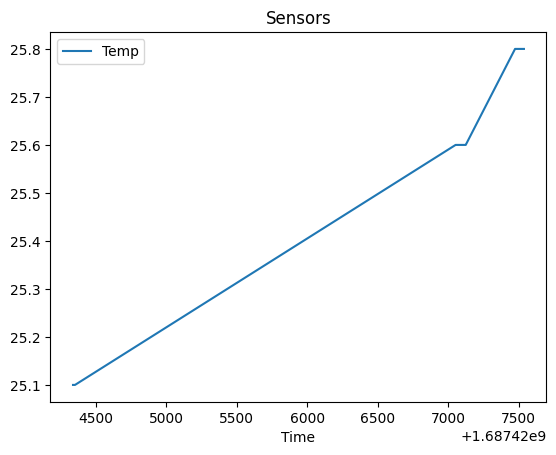

In [11]:
plottable_sense_3.plot(x="Time", y="Temp", kind="line", title="Sensors")

### Combined plot of all sensors

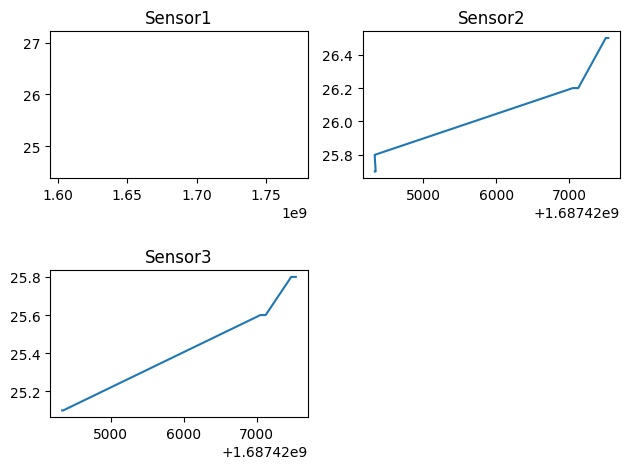

In [8]:
plotFigure = plt.figure()

plot1 = plotFigure.add_subplot(221)
plot1.set_title("Sensor1")
plot1.plot(plottable_sense_1["Time"], plottable_sense_1["Temp"])

plot2 = plotFigure.add_subplot(222)
plot2.set_title("Sensor2")
plot2.plot(plottable_sense_2["Time"], plottable_sense_2["Temp"])

plot3 = plotFigure.add_subplot(223)
plot3.set_title("Sensor3")
plot3.plot(plottable_sense_3["Time"], plottable_sense_3["Temp"])

plotFigure.tight_layout(h_pad=2)
